https://colab.research.google.com/drive/1a8R54TUFHgrwBASTWk-aYf9lXmagCH1H

In [ ]:
pip install stanza

     |████████████████████████████████| 337 kB 7.7 MB/s 


In [ ]:
import stanza
stanza.download('en',package = 'craft')

2021-08-07 17:51:55 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |
| pretrain  | craft   |



2021-08-07 17:52:25 INFO: Finished downloading models and saved to /root/stanza_resources.


Load modules and dataset



In [ ]:
from IPython import display
import math
from pprint import pprint #pretty print json & list
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns #add stype to matplolib graphs 
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
import gensim 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from gensim.parsing.preprocessing import strip_numeric,strip_multiple_whitespaces, strip_punctuation, strip_short, strip_tags

In [ ]:
from collections import Counter 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/bbc_test_novideos_v3(sentiment).csv',encoding = 'latin1')

In [ ]:
df.head()

,link,text,Sentiment_1,Sentiment_2
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

new_words = {
    'to attack':-0.5,
    'backwards':-0.5,
    'alert':0.5,
    'anxiety disorder':-0.4,
    'baal':-0.4,
    'sucks':-0.4,
    'shortness of breath':-0.5,
    'side effect':-0.4,
    'bladder infection':-0.5,
    'bleed':-0.5,
    'blood loss':-0.5,
    'stomachache':-0.5,
    'decisive':0.4,
    'intenstinal complaints':-0.4,
    'depression':-0.5,
    'diarrhea':-0.5,
    'breakthrough':0.5,
    'down':-0.4,
    'giddy':-0.4,
    'dream':0.4,
    'dizziness':-0.5,
    'appetite':0.4,
    'misery':-0.5,
    'energy':0.5,
    'worse':-0.4,
    'to enjoy':0.5,
    'swollen':-0.5,
    'hair loss':-0.6,
    'heart attack':-0.5,
    'heart problems':-0.4,
    'palpitations':-0.4,
    'unfortunate':-0.5,
    'help out':0.5,
    'cough':-0.4,
    'headache':-0.5,
    'hayfever':-0.5,
    'skin rash':-0.4,
    'delicious':0.5,
    'incontinence':-0.4,
    'itching':-0.5,
    'sore throat':-0.5,
    'complaint':-0.4,
    'complaints':-0.4,
    'popping':-0.4,
    'banging':-0.5,
    'fever':-0.4,
    'short of breath':-0.4,
    'cramp':-0.4,
    'stomach upset':-0.4,
    'stomach cramps':-0.4,
    'migraine':-0.4,
    'nausea':-0.6,
    'fatigue':-0.5,
    'nightmare':-0.5,
    'constipation':-0.5,
    'unrest':-0.4,
    'ignite':-0.4,
    'inflammation':-0.4,
    'tinnitus':-0.5,
    'rush':-0.5,
    'excited':0.4,
    'stuffed':-0.5,
    'hot flash':-0.4,
    'throw up':-0.6,
    'panic attack':-0.4,
    'pain':-0.4,
    'positive':0.4,
    'fun':0.4,
    'problem':-0.4,
    'reaction':-0.4,
    'rheumatism':-0.5,
    'chills':-0.5,
    'mess':-0.5,
    'crap':-0.5,
    'peace':0.5,
    'calmer':0.5,
    'groom':-0.5,
    'muscle strain':-0.5,
    'more stable':0.5,
    'stab':-0.4,
    'mood swings':-0.5,
    'disorder':-0.5,
    'good luck':0.6,
    'drowsiness':-0.3,
    'satisfaction':0.5,
    'tingling':-0.4,
    'topper':0.6,
    'junk':-0.6,
    'equipped':0.5,
    'improved':-0.5,
    'improvement':0.6,
    'sad':-0.5,
    'common cold':-0.3,
    'lighting':0.5,
    'fatigue':-0.4,
    'trust':0.4,
    'dirty':-0.3,
    'progress':0.3,
    'to work':0.5,
    'panacea':0.7,
    'security':0.4,
    'self confidence':0.4
}



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sia = SIA()
sia.lexicon.update(new_words)

In [ ]:
def polarity(text):
  pol_score = sia.polarity_scores(text)
  return pol_score

In [ ]:
df['polarity_score'] = df.text.apply(polarity)

In [ ]:
df.head()

,link,text,Sentiment_1,Sentiment_2,polarity_score
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"{'neg': 0.065, 'neu': 0.893, 'pos': 0.042, 'co..."
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"{'neg': 0.104, 'neu': 0.792, 'pos': 0.104, 'co..."
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"{'neg': 0.097, 'neu': 0.885, 'pos': 0.017, 'co..."
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co..."
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"{'neg': 0.094, 'neu': 0.796, 'pos': 0.109, 'co..."


In [ ]:
df.polarity_score[0]

{'compound': -0.923, 'neg': 0.065, 'neu': 0.893, 'pos': 0.042}

In [ ]:
def label(polarity_score):
  if polarity_score['compound'] > 0.2 :
    return 1
  elif polarity_score['compound'] < -0.2 :
    return -1
  else:
    return 0

In [ ]:
 df['label']=df.polarity_score.apply(label)

In [ ]:
df.head()

,link,text,Sentiment_1,Sentiment_2,polarity_score,label
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"{'neg': 0.065, 'neu': 0.893, 'pos': 0.042, 'co...",-1
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"{'neg': 0.104, 'neu': 0.792, 'pos': 0.104, 'co...",-1
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"{'neg': 0.097, 'neu': 0.885, 'pos': 0.017, 'co...",-1
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co...",1
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"{'neg': 0.094, 'neu': 0.796, 'pos': 0.109, 'co...",1


In [ ]:
df.loc[df['label'] == 0]

,link,text,Sentiment_1,Sentiment_2,polarity_score,label
59,https://www.bbc.co.uk/news/world-africa-48012266,A large-scale pilot of what has been called th...,1,1,"{'neg': 0.047, 'neu': 0.899, 'pos': 0.054, 'co...",0


In [ ]:
df.loc[df['label'] == 1]

,link,text,Sentiment_1,Sentiment_2,polarity_score,label
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co...",1
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"{'neg': 0.094, 'neu': 0.796, 'pos': 0.109, 'co...",1
8,https://www.bbc.co.uk/news/health-47771688,Pregnant women in England will be able to get ...,1,1,"{'neg': 0.101, 'neu': 0.798, 'pos': 0.102, 'co...",1
9,https://www.bbc.co.uk/news/health-47735253,Controversial vaginal mesh implants can be off...,-1,-1,"{'neg': 0.079, 'neu': 0.83, 'pos': 0.091, 'com...",1
11,https://www.bbc.co.uk/news/uk-northern-ireland...,Do you ever struggle to tell your left from yo...,0,0,"{'neg': 0.026, 'neu': 0.878, 'pos': 0.097, 'co...",1
12,https://www.bbc.co.uk/news/health-47707954,A speedy 'non-surgical' nose job that takes ju...,0,0,"{'neg': 0.056, 'neu': 0.846, 'pos': 0.098, 'co...",1
13,https://www.bbc.co.uk/news/newsbeat-47787138,People in the UK are more likely to combine dr...,-1,-1,"{'neg': 0.028, 'neu': 0.918, 'pos': 0.053, 'co...",1
15,https://www.bbc.co.uk/news/world-us-canada-477...,A 61-year-old Nebraskan woman has told of her ...,1,1,"{'neg': 0.058, 'neu': 0.845, 'pos': 0.098, 'co...",1
16,https://www.bbc.co.uk/news/world-us-canada-477...,US President Donald Trump has said he wants to...,-1,-1,"{'neg': 0.049, 'neu': 0.846, 'pos': 0.105, 'co...",1
17,https://www.bbc.co.uk/news/health-47787908,A growing number of parents are confused about...,0,0,"{'neg': 0.039, 'neu': 0.87, 'pos': 0.091, 'com...",1


In [ ]:
df.loc[df['label'] == -1]

,link,text,Sentiment_1,Sentiment_2,polarity_score,label
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"{'neg': 0.065, 'neu': 0.893, 'pos': 0.042, 'co...",-1
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"{'neg': 0.104, 'neu': 0.792, 'pos': 0.104, 'co...",-1
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"{'neg': 0.097, 'neu': 0.885, 'pos': 0.017, 'co...",-1
5,https://www.bbc.co.uk/news/uk-northern-ireland...,A prescription drug linked to 33 deaths in 201...,-1,1,"{'neg': 0.06, 'neu': 0.885, 'pos': 0.055, 'com...",-1
6,https://www.bbc.co.uk/news/newsbeat-47770982,"The sun is shining on your skin, there's a bre...",0,1,"{'neg': 0.059, 'neu': 0.902, 'pos': 0.038, 'co...",-1
7,https://www.bbc.co.uk/news/world-asia-china-47...,China says it will crack down on all types of ...,0,0,"{'neg': 0.116, 'neu': 0.821, 'pos': 0.064, 'co...",-1
10,https://www.bbc.co.uk/news/science-environment...,The countdown has begun to the launch of one o...,-1,1,"{'neg': 0.09, 'neu': 0.852, 'pos': 0.058, 'com...",-1
14,https://www.bbc.co.uk/news/world-latin-america...,A judge in Brazil has ordered identical twin b...,-1,-1,"{'neg': 0.08, 'neu': 0.896, 'pos': 0.025, 'com...",-1
18,https://www.bbc.co.uk/news/health-47734296,The food we eat is putting 11 million of us in...,-1,0,"{'neg': 0.143, 'neu': 0.774, 'pos': 0.083, 'co...",-1
19,https://www.bbc.co.uk/news/uk-scotland-47803975,The routine vaccination of girls with the HPV ...,0,1,"{'neg': 0.086, 'neu': 0.837, 'pos': 0.076, 'co...",-1


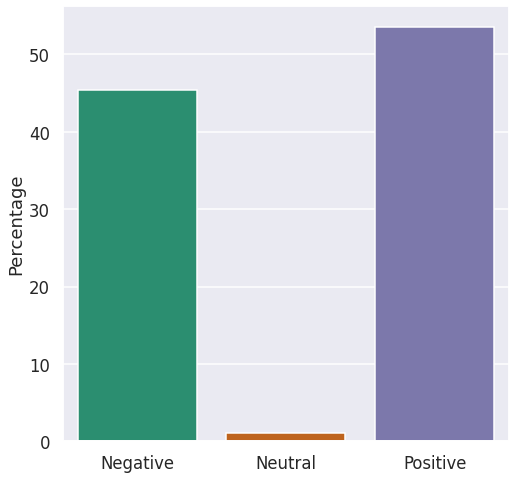

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
new_sw = ['people','say','says','said','could','one','would','take','want','have','she','he','give','told','know','but','health','month','day','year', 'minute','second','hundred','thousand','however']
stop_words = STOPWORDS.union(set(new_sw))

In [ ]:
pubmed_stoplist = ['a','about','again','all','almost', 'also','although','always',\
                   'among','an','and','another','any','are','as','at','be','because',\
                   'been','before','being','between','both','but','by','can','could',\
                   'did','do','does','done','due','during','each','either','enough', \
                   'especially','etc','for','found', 'from','further','had','is','it',\
                   'has','have','having','here','how','however','i','if','in','into',\
                   'its','itself','just','kg','km', 'made','mainly','make','may','mg',\
                   'might','ml','mm','most','mostly','must','nearly','neither','no',\
                   'nor','obtained','of','often','on','our','overall','perhaps','pmid',\
                   'quite','rather','really','regarding','seem','seen','several',\
                   'should','show','showed','shown','shows','significantly','since',\
                   'so','some','such','than','that','the','their','theirs','them',\
                   'then','there','therefore','these','they','this','those','through',\
                   'thus','to','upon','use','used','using','various','very', 'was','we',\
                   'were','what','when', 'which','while','with','within','without','would']
stop_words = STOPWORDS.union(set(pubmed_stoplist))

In [ ]:
print(stop_words)

frozenset({'amount', 'co', 'does', 'make', 'found', 'one', 'around', 'in', 'various', 'nearly', 'afterwards', 'been', 'towards', 'six', 'therein', 'there', 'because', 'and', 'whom', 'all', 'doesn', 'beforehand', 'due', 'becomes', 'ever', 'put', 'off', 'thence', 'get', 'under', 'than', 'another', 'thereafter', 'might', 'other', 'do', 'rather', 'before', 'sometime', 'especially', 'enough', 'regarding', 'namely', 'about', 'quite', 'should', 'well', 'through', 'cry', 'none', 'the', 'had', 'whence', 'whither', 'having', 'made', 'anyhow', 'why', 'side', 'cant', 'seemed', 'go', 'move', 'behind', 'throughout', 'done', 'though', 'my', 'besides', 'was', 'shows', 'overall', 'except', 'hereafter', 'thin', 'perhaps', 'give', 'three', 'mostly', 'mg', 'don', 'still', 'forty', 'were', 'less', 'whereupon', 'how', 'couldnt', 'never', 'him', 'once', 'it', 'beyond', 'with', 'either', 'whole', 'a', 'moreover', 'etc', 'seem', 'could', 'detail', 'anyone', 'until', 'be', 'showed', 'herself', 'into', 'yourselv

In [ ]:
nlp_craft = stanza.Pipeline('en',package = 'craft',processor = 'pos,tokenize,lemma')

2021-08-07 18:13:12 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |

2021-08-07 18:13:12 INFO: Use device: gpu
2021-08-07 18:13:12 INFO: Loading: tokenize
2021-08-07 18:13:12 INFO: Loading: pos
2021-08-07 18:13:12 INFO: Loading: lemma
2021-08-07 18:13:12 INFO: Loading: depparse
2021-08-07 18:13:13 INFO: Done loading processors!


In [ ]:
def cleaning(text):
  # clean =[]
  text = strip_multiple_whitespaces(text)
  # text = strip_numeric(text)
  text = strip_punctuation(text)
  text = strip_tags(text)
  # text = strip_short(text,minsize=3)
  text = remove_stopwords(text)
  text = text.lower()
  # # lower case, de-accents.  Convert the texts into a list of tokens
  # for token in gensim.utils.simple_preprocess(text, deacc=True):
  #   clean.append(token)
  lem_text = nlp_craft(text)
  return lem_text

In [ ]:
df['clean_text'] = df.text.apply(cleaning)

In [ ]:
def token_list(nlp_doc):
  token_list = []
  for i in range(len(nlp_doc.sentences)):
    article_token_list = []
    for m in range(len(nlp_doc.sentences[i].tokens)):
      token = nlp_doc.sentences[i].words[m].lemma
      if token not in stop_words or len(token)>2:
        article_token_list.append(token)
    token_list.append(article_token_list)
  return token_list

In [ ]:
df['token_list'] = df.clean_text.apply(token_list)

In [ ]:
df.head()

,link,text,Sentiment_1,Sentiment_2,polarity_score,label,clean_text,token_list
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"{'neg': 0.065, 'neu': 0.893, 'pos': 0.042, 'co...",-1,"[\n [\n {\n ""id"": 1,\n ""text"": ""...","[[psychiatrist, urge, ask, child, mental, heal..."
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"{'neg': 0.104, 'neu': 0.792, 'pos': 0.104, 'co...",-1,"[\n [\n {\n ""id"": 1,\n ""text"": ""...","[[the, number, adult, seek, help, cope, alcoho..."
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"{'neg': 0.097, 'neu': 0.885, 'pos': 0.017, 'co...",-1,"[\n [\n {\n ""id"": 1,\n ""text"": ""...","[[the, current, check, newborn, hip, problem, ..."
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co...",1,"[\n [\n {\n ""id"": 1,\n ""text"": ""...","[[calorie, fill, easter, egg, sell, shop, far,..."
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"{'neg': 0.094, 'neu': 0.796, 'pos': 0.109, 'co...",1,"[\n [\n {\n ""id"": 1,\n ""text"": ""...","[[she, desperate, end, currently, toothbrush, ..."


In [ ]:
df.token_list[0]

[['psychiatrist',
  'urge',
  'ask',
  'child',
  'mental',
  'health',
  'issue',
  'long',
  'spend',
  'online',
  'use',
  'social',
  'media',
  'question',
  'technology',
  'routine',
  'assessment',
  'royal',
  'college',
  'psychiatrist',
  'say',
  'concerned',
  'time',
  'spend',
  'online',
  'impact',
  'mood',
  'sleep',
  'diet',
  'behaviour',
  'the',
  'government',
  'expect',
  'announce',
  'plan',
  'regulate',
  'social',
  'media',
  'company',
  'soon',
  'the',
  'college',
  "'s",
  'advice',
  'come',
  'evidence',
  'grow',
  'possible',
  'link',
  'harmful',
  'content',
  'time',
  'spend',
  'online',
  'poor',
  'mental',
  'health',
  'plan',
  'publish',
  'report',
  'later',
  'year',
  'stance',
  'technology',
  'use',
  'child',
  "'s",
  'mental',
  'health',
  'include',
  'recommendation',
  'parent',
  'child',
  'doctor',
  'when',
  'assess',
  'child',
  'psychiatrist',
  'advise',
  'think',
  'the',
  'royal',
  'college',
  'psychiat

In [ ]:
pos_text = df.token_list[df.label ==1]

In [ ]:
pos_text_list = [item for text in pos_text for item in text]
pos_text_list_join = [word for text in pos_text_list for word in text]

pos_freq = Counter(word for word in pos_text_list_join)
pos_freq.most_common(20)

[('say', 406),
 ("'s", 281),
 ('the', 244),
 ('people', 179),
 ('year', 139),
 ('child', 131),
 ('t', 111),
 ('patient', 96),
 ('work', 96),
 ('tell', 89),
 ('health', 88),
 ('time', 87),
 ('she', 86),
 ('but', 86),
 ('like', 85),
 ('treatment', 73),
 ('woman', 72),
 ('life', 71),
 ('uk', 70),
 ('help', 69)]

In [ ]:
neg_text = df.token_list[df.label == -1]
neg_text_list = [item for text in neg_text for item in text]
neg_text_list_join = [word for text in neg_text_list for word in text]

neg_freq = Counter(word for word in neg_text_list_join)
neg_freq.most_common(20)

[('say', 308),
 ('the', 246),
 ("'s", 190),
 ('people', 144),
 ('cancer', 127),
 ('year', 112),
 ('brain', 95),
 ('drug', 94),
 ('health', 91),
 ('disease', 89),
 ('t', 82),
 ('study', 77),
 ('woman', 73),
 ('risk', 70),
 ('child', 69),
 ('but', 63),
 ('case', 63),
 ('life', 61),
 ('time', 59),
 ('new', 58)]

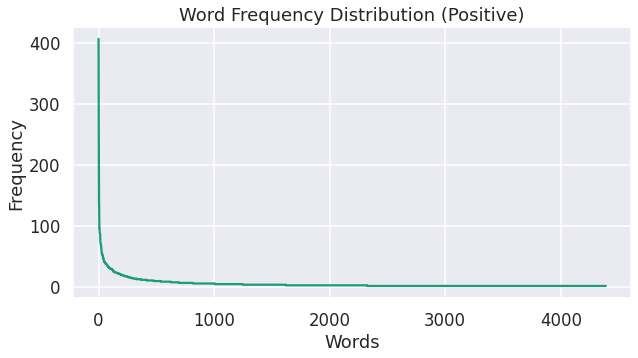

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

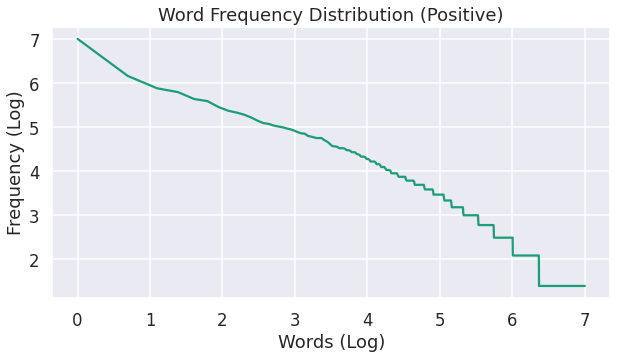

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
pos_list = [i[0] for i in pos_freq.most_common(50)]

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

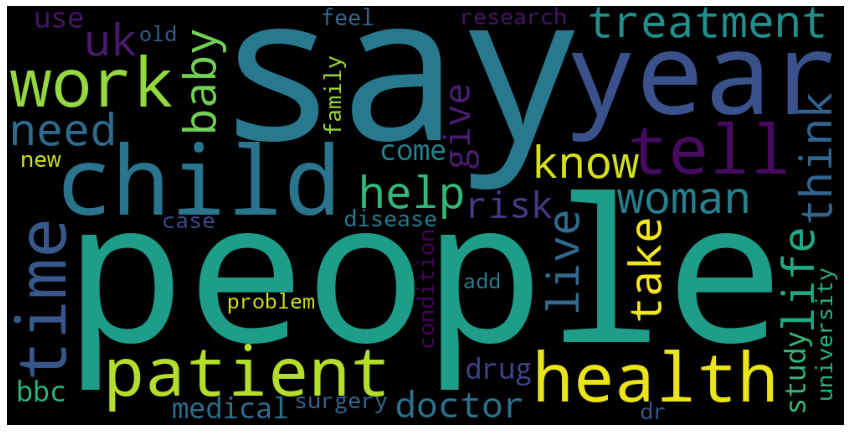

In [ ]:
#convert list to string and generate
unique_string=(" ").join(pos_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

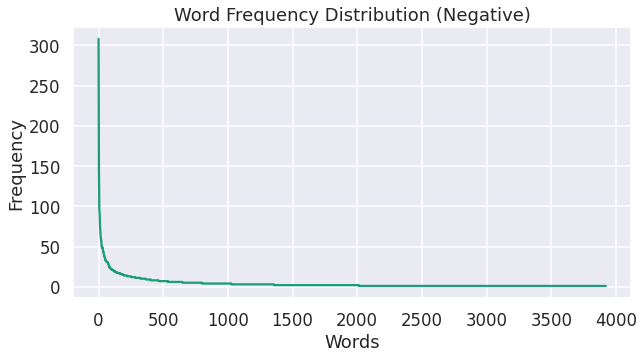

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

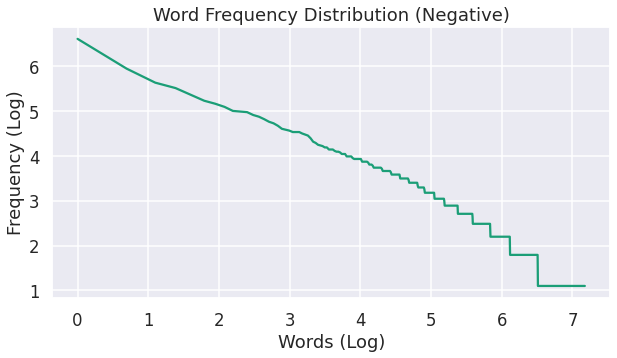

In [ ]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
neg_word_list = [i[0] for i in neg_freq.most_common(50)]

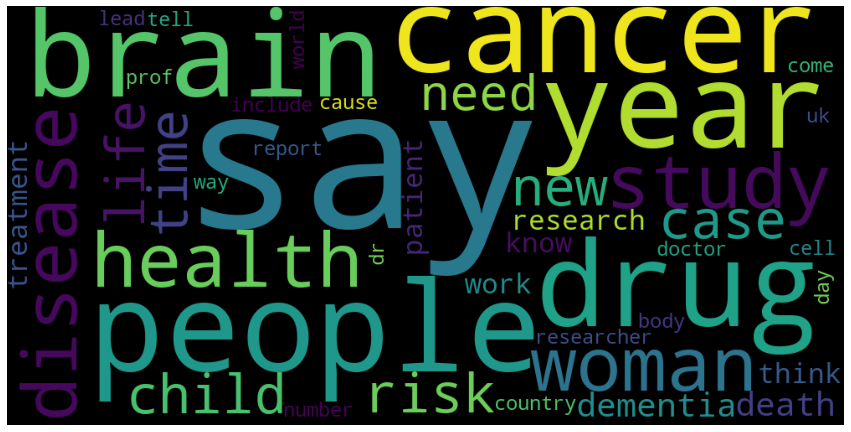

In [ ]:
neg_unique_string=(" ").join(neg_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(neg_unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
sentiment_label =df.iloc[:, 1]
comparison = np.where(sentiment_label == df2['label'], True, False)

In [ ]:
print(comparison)

[ True  True  True False False  True False False  True False  True False
 False False  True  True False False  True False False  True False False
  True False False False  True False False False False False  True False
  True  True False False  True False  True False  True  True  True  True
  True False False False False False  True False False False  True False
 False False False False  True False False  True False False False False
 False  True False  True  True  True False False False  True False  True
  True False False  True False  True False False False  True  True False
 False False False  True]


In [ ]:
np.count_nonzero(comparison)

38